In [1]:
import os

print(os.listdir('./영화 관객수'))

['movies_test.csv', 'movies_train.csv', 'submission.csv']


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_train = pd.read_csv('./영화 관객수/movies_train.csv', encoding='utf-8')
df_test = pd.read_csv('./영화 관객수/movies_test.csv', encoding='utf-8')

df_train.head()


Bad key "text.kerning_factor" on line 4 in
C:\Users\YH\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


## Feature

- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수

# EDA

## 1. 결측치 확인

In [3]:
print('< Train >')
print(df_train.info())
print('\n','< Test >')
print(df_test.info())

< Train >
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB
None

 < Test >
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          -----

[Train]
- dir_prev_bfnum 결측치 : 330개

[Test]
- dir_prev_bfnum 결측치 : 136개

### dir_prev_bfnum 변수의 분포 확인

#### Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x24d65c38f88>,
 'caps': [<matplotlib.lines.Line2D at 0x24d65c3ed48>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d65c28e88>],
 'medians': [<matplotlib.lines.Line2D at 0x24d65c44c08>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d65c44d08>],
 'means': []}

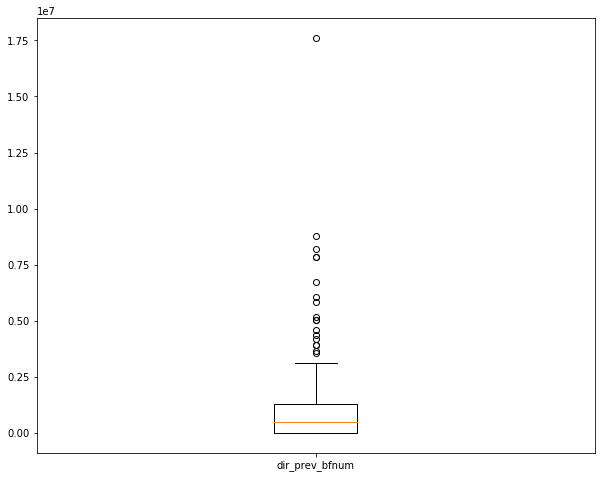

In [4]:
# 결측치는 제외
temp = df_train['dir_prev_bfnum'].dropna()

# boxplot
plt.figure(figsize=(10,8))
plt.boxplot(temp, labels=['dir_prev_bfnum'])

#### 통계량

In [5]:
# 지수표현법 끄기
pd.options.display.float_format = '{:.2f}'.format
# 다시 지수표현법으로 변환하려면
# pd.reset_option('display.float_format')

temp.describe()

count        270.00
mean     1050442.89
std      1791408.30
min            1.00
25%        20380.00
50%       478423.62
75%      1286568.62
max     17615314.00
Name: dir_prev_bfnum, dtype: float64

- min 값이 1인데 평균 관람 관객수가 1 이라는 것이 말이 안됨

-> 평균 관객수가 100명이 되지 않는 데이터 확인

In [6]:
temp2 = temp[temp < 100]
temp2

4      1.00
114   20.00
176   38.50
186   17.00
202    7.00
278   72.50
403   57.00
465    8.00
552   19.00
Name: dir_prev_bfnum, dtype: float64

In [7]:
temp_df = df_train[['dir_prev_bfnum', 'box_off_num']].dropna()
temp_df

,dir_prev_bfnum,box_off_num
1,1161602.50,7072501
2,220775.25,6959083
3,23894.00,217866
4,1.00,483387
5,837969.00,233211
...,...,...
587,67602.00,12696
588,2061296.67,1612554
592,597497.00,1472147
595,3833.00,1475091


#### dir_prev_bfnum 변수 EDA결과

- 결측치가 너무 많아서 변수를 사용하기 힘들 것 같다.

하지만, 이 변수가 목적변수(box_off_num)와 correlation이 존재한다면, 범주형 변수로 변경후 예측에 사용할 수 있을 것 같음

### 상관계수 확인

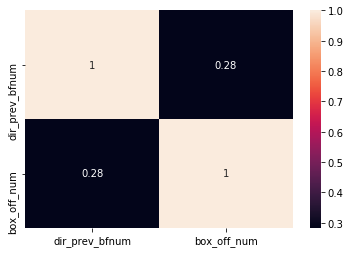

In [8]:
import seaborn as sns

sns.heatmap(temp_df.corr(), linecolor='white', annot=True)

- 상관계수가 0.28로 매우 낮은 상관관계를 보인다. 고로 dir_prev_bfnum 변수는 예측에서 제외한다

### dir_prev_bfnum 변수 제외

In [9]:
df_train = df_train.drop('dir_prev_bfnum', axis=1)
df_test = df_test.drop('dir_prev_bfnum', axis=1)